# Teoria erorilor
## Măsuri ale erorii
### Erori absolute și erori relative
* eroare absolută = val. aproximativă - val. exactă ($\|\Delta x\| = \|x - x^*\|$)
* eroare relativă = $\frac{\text{eroare absolută}}{\text{valoare exactă}}$ ($\delta x = \frac{\|\Delta x\|}{\|x\|},\ x \ne 0$). Cum $x$ este necunoscut în practică, folosim $\delta x = \frac{\|\Delta x\|}{\|x^*\|}$, unde $x^* \approx x$ se numește aproximanta lui $x$.
* valoare aproximativă = (valoare exactă)(1 + eroare relativă)

Dacă lucrăm peste $\mathbb{R}$, atunci $\delta x = \frac{\delta x}{x}$ și $\Delta x = x^* - x$.

In [ ]:
x = 1.9 # Ca exemplu; ofc, x ≠ 0
x′ = 1.8989 # x∗
Δx = abs(x′ - x)
δx = abs(Δx / x)
println("Eroarea absolută: ", Δx)
println("Eroarea relativă (în procente): ", δx * 100.0, "%")

### Erori apriori și erori aposteriori
* eroare apriori: $\Delta x = x^* - x$
* eroare aposteriori: $\Delta y = f(x^*) - y$

In [ ]:
f(x) = √x
x  = 2
x′ = 1.96
Δx = abs(x′ - x) # Eroarea apriori
y  = f(x)
y′ = f(x′)
Δy = abs(y′ - y) # Eroarea aposteriori
println("Eroarea apriori: ", Δx)
println("Eroarea aposteriori: ", Δy)

println()

δx = abs(Δx / x) * 100 # Eroarea apriori relativă
δy = abs(Δy / y) * 100 # Eroarea aposteriori relativă
println("Eroarea apriori relativă: ", δx, "%")
println("Eroarea aposteriori relativă: ", δy, "%")

### Condiționarea numerică. Factor de condiționare
Problema se numeşte *bine condiționată* dacă variaţiile relative ale soluţiei au
acelaşi ordin de mărime cu variaţiile relative ale datelor de intrare ce le
cauzează.

Problema este *rău condiţionată* dacă modificările relative care au loc în
soluţiei pot fi mult mai mari decât cele ale datelor de intrare.

*Factorul de condiționare* se definește prin:
\begin{equation*}
  \text{cond} = \frac{\text{variația relativă a soluției}}{\text{variația relativă a datelor de intrare}}
\end{equation*}

Să revenim la calculul $y = f(x)$, unde $f : \mathbb{R} \to \mathbb{R}$. Să presupunem că
se obţine valoarea aproximativă $y^*$. Fie $x^*$ cu proprietatea că $f(x^*) =
y^*$. Avem:
\begin{equation*}
  \text{cond} = \frac{\left| \frac{f(x^*) - f(x)}{f(x)} \right|}{ \left| \frac{x^* - x}{x} \right|} = \frac{\left| \frac{\Delta y}{y} \right|}{\left| \frac{\Delta x}{x} \right|} = \frac{|x|}{|y|} \cdot \frac{|\Delta y|}{|\Delta x|}
\end{equation*}

Problema este rău condițională dacă factorul de condiționare $\text{cond} \gg
1$.

In [ ]:
factCond = abs(Δy / y) / abs(Δx / x)

Factorul de condiţionare acţionează ca un „factor de amplificare”, legând eroarea
aposteriori de eroarea apriori:
\begin{equation*}
  |\text{eroarea relativă aposteriori}| = \text{cond} \cdot |\text{eroarea relativă apriori}|
\end{equation*}

De obicei factorul de condiţionare nu este cunoscut exact şi poate varia în
funcţie de datele de intrare. De aceea se utilizează o estimaţie margine
superioară pentru factorul de condiționare. Deci:
\begin{equation*}
  |\text{eroarea relativă aposteriori}| \lessapprox \text{cond} \cdot |\text{eroarea relativă apriori}|
\end{equation*}

Considerăm un exemplu de estimare pentru factorul de condiţionare. Să presupunem
că se evaluează funcţia $f$ pentru data de intrare aproximativă $x^* = x + ∆x$
în locul datei exacte de intrare $x$. Eroarea absolută aposteriori este
\begin{equation*}
  f (x + \Delta x) − f (x) \approx f'(x)\Delta x
\end{equation*}
iar eroarea relativă aposteriori este
\begin{equation*}
  \frac{f(x + \Delta x) - f(x)}{f(x)} \approx \frac{f'(x)\Delta x}{f(x)}
\end{equation*}

Factorul de condiționare este:
\begin{equation*}
  \text{cond} = \frac{\left| \frac{f'(x)\Delta x}{f(x)} \right|}{ \left| \frac{\Delta x}{x} \right|} = \left| \frac{xf'(x)}{f(x)} \right|
\end{equation*}

## Propagarea erorilor de calcul
Fie $f : \mathbb{R} \to \mathbb{R}$ o funcție reală, $x$ valoarea de intrare exactă, $x^*$ valoarea de intrare aproximativă, $f(x)$ rezultatul dorit și $f^*$ funcția aproximativă de calcul.

Eroarea totală este dată de suma erorii de calcul și erorii propagate ale datelor, unde:
* eroare de calcul = $f^*(x^*) - f(x^*)$
* eroare a datelor = $x^* - x = \Delta x$

(este important acest capitol nu ca să bag eu bullshit, ci pentru că erorile chiar se pot aduna, de exemplu cum era mai sus cu `0.040000000000000036` când răspunsul era de fapt fix `0.04`)

In [ ]:
x′ = 0.010000000003
x = 0.01
ed = x′ - x # eroarea datelor
f(x) = sin(x)
f′(x) = x # sin x ~ x la valori f. mici
ec = f′(x′) - f(x′) # eroarea de calcul
println("Eroarea de calcul: ", ec)
println("Eroarea datelor: ", ed)

Fie $x = x^* + \Delta_x$ și $y = y^* + \Delta_y$, unde $\Delta_x$ și $\Delta_y$ reprezintă erorile introduse pentru $x$ și $y$.

### Propagarea erorilor la adunare
Presupunem că se efectuează $x + y = x^* + y^* + \Delta_x + \Delta_y$ astfel încât eroarea relativă la sumare este:
\begin{equation*}
\frac{\Delta_{x+y}}{x^* + y^*} = \frac{\Delta_x + \Delta_y}{x^* + y^*} = \frac{x^*}{x^* + y^*} \delta{}x + \frac{y^*}{x^* + y^*} \delta{}y
\end{equation*}

adică o sumă ponderată a erorilor introduse la reprezentarea cantității sumate.
Notăm cu $\varepsilon_s$ eroarea introdusă suplimentar la reprezentarea sumei
$x^* + y^*$.

Eroarea relativă totală la sumare, $\varepsilon_{ts}$, va fi:
\begin{equation*}
  \varepsilon_{ts} = \frac{x^*}{x^* + y^*} \delta{}x + \frac{y^*}{x^* + y^*} \delta{}y + \varepsilon_{s}
\end{equation*}
### Propagarea erorilor la scădere
Presupunem că se efectuează $x - y = x^* - y^* + \Delta_x - \Delta_y$ astfel încât eroarea relativă la sumare este:
\begin{equation*}
\frac{\Delta_{x-y}}{x^* - y^*} = \frac{\Delta_x - \Delta_y}{x^* - y^*} = \frac{x^*}{x^* - y^*} \delta{}x - \frac{y^*}{x^* - y^*} \delta{}y
\end{equation*}

Notăm cu $\varepsilon_d$ eroarea introdusă suplimentar la reprezentarea diferenței
$x^* - y^*$. Eroarea relativă la scădere, $\varepsilon_{td}$, va fi:
\begin{equation*}
  \varepsilon_{td} = \frac{x^*}{x^* - y^*} \delta{}x - \frac{y^*}{x^* - y^*} \delta{}y + \varepsilon_{d}
\end{equation*}

### Propagarea erorilor la înmulțire
Presupunem că se efectueaza produsul numerelor
\begin{equation*}
xy = (x^* + \Delta_x)(y^* + \Delta_y) = (xy)^* + y^*\Delta_x + x^*\Delta_y
\end{equation*}
unde s-a neglijat produsul $\Delta_x\Delta_y$ considerat ca având un ordin de
marime suficient de mic.

Eroarea la înmulțire este
\begin{equation*}
  \frac{\Delta_{xy}}{(xy)^*} = \frac{\Delta_x}{x^*} + \frac{\Delta_y}{y^*} = \delta x + \delta y.
\end{equation*}

Deci la înmulțire erorile introduse inițial se adună. Pot aparea noi erori,
deoarece produsul $xy$ poate avea un număr de cifre semnificative mai mare decât
cel admis, necesitând o nouă rotunjire. Notând cu $\varepsilon_p$ această nouă
eroare, vom obține eroarea totală $\varepsilon_{tp}$ la înmulțirea a două
numere
\begin{equation*}
  \varepsilon_{tp} = \delta x + \delta y + \varepsilon_p
\end{equation*}
iar ca margine a erorii
\begin{equation*}
  |\varepsilon_{tp}| \leq |\delta x| + |\delta y| + |\varepsilon_p| < 15 \cdot 10^{-k}
\end{equation*}
acoperitoare deoarece erorile se compun după legi probabilistice.

Presupunem că se efectuează împărțirea numerelor
\begin{equation*}
  \frac{x}{y} = \frac{x^* + \Delta_x}{y^* + \Delta_y} = \frac{x^* + \Delta_x}{y^*\left( 1 + \frac{\Delta_y}{y} \right)} = \frac{x^* + \Delta_x}{y^*} \cdot \frac{1}{1 + \frac{\Delta_y}{y}} = \frac{x^* + \Delta_x}{y^*}\sum_{n = 0}^{\infty} \left(\frac{-\Delta_y}{y}\right)^n
\end{equation*}

Deoarece seria este convergentă, exprimând-o liniar, obținem
\begin{equation*}
  \frac{x}{y} \approx \frac{x^*}{y^*} + \frac{\Delta_x}{x^*} - \frac{x^*}{(y^*)^2}\Delta_y.
\end{equation*}

Eroarea la împărțire este
\begin{equation*}
  \frac{\Delta_{x/y}}{\frac{x^*}{y^*}} = \frac{\Delta_x}{x^*} - \frac{\Delta_y}{y^*} = \delta x - \delta y
\end{equation*}

Notând cu $\varepsilon_j$ noua eroare datorată împărțirii și cu
$\varepsilon_{tj}$ eroarea totală la împărțirea a două numere, obținem
\begin{equation*}
  \varepsilon_{tj} = \delta x - \delta y + \varepsilon_j.
\end{equation*}

## Norme de vectori și matrice

Exemple de norme ale unui vector utilizate în curs:
* $\displaystyle \|x\|_\infty = \max_{1 \leq i \leq n} |x_i|\qquad$ = norma maximum sau norma infinit;
* $\displaystyle \|x\|_1 = \sum_{i = 1}^n |x_i|\qquad$ = norma-1
* $\displaystyle \|x\|_2 = \sqrt{\sum_{i = 1}^n |x_i|^2}\qquad$ norma euclidiană

Exemple de norme ale matricelor:
* $\displaystyle \|A\|_\infty = \max_{i} \sum_{j} |a_{ij}|$;
* $\displaystyle \|A\|_1 = \max_{j} \sum_{i} |a_{ij}|$;
* $\displaystyle \|A\|_2 = \sqrt{\rho(A^*A)}$, unde $A^* =
   \overline{A}^{T}$ ($A$-conjugat transpus), $\displaystyle \rho = \max_{i} \lambda_i$, unde
   $\lambda_i$ sunt valorile proprii ale matricei și $\rho$ se numește raza
   spectrală a matricei.

In [ ]:
x = round.(Int, rand(1, 5).*rand(1:10))'
A = round.(Int, rand(5, 5).*rand(1:10))

using LinearAlgebra, Latexify, LaTeXStrings

function displayNorm(X, sym, symType)
    if size(X, 1) == 1 || size(X, 2) == 1
        display(latexify(string(L"\|x\|_%$(sym) = %$(norm(X, symType))")))
    else
        display(latexify(string(L"\|A\|_%$(sym) = %$(norm(X, symType))")))
    end
end

display(latexify(x))
println("Norme pentru vectori:")
displayNorm(x, "∞", Inf)
displayNorm(x, "1", 1)
displayNorm(x, "2", 2)
display(latexify(A))
println("Norme pentru matrice:")
displayNorm(A, "∞", Inf)
displayNorm(A, "1", 1)
displayNorm(A, "2", 2)

# Rezolvarea numerică a ecuațiilor neliniare
## Metode iterative de rezolvare a ecuațiilor liniare
### Metoda tangentei/Newton
Fie ecuația $f(x) = 0,\ x \in [a, b]$. Presupunem că ecuația admite o soluție izolată $\xi$ pe $[a, b]$, adică $f(a)f(b) < 0$. Presupunem următoarele condiții:
* $f$ continuă pe $[a, b]$;
* $f$ este derivabilă de două ori pe $[a, b]$ și derivata a doua păstrează semn constant pe $[a, b]$;
* derivata de ordinul I nu se anulează pe intervalul specificat

Relația de recurență este:
\begin{equation*}
  x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)},\qquad n = 0,\ 1,\ ...
\end{equation*}
Condiția de oprire este:
\begin{equation}
  |x_{n+1} - x_{n}| = \left| \frac{f(x_n)}{f'(x_n)} \right| \le \varepsilon
\end{equation}
unde $\varepsilon$ este termenul eroare stabilit (precizia).

Algoritmul este dat jos. Pentru a face graficul, trebuie să oferi niște capete (merge în jurul lui $x_0$).

Method converged to -0.19993610217122 in 2 steps.


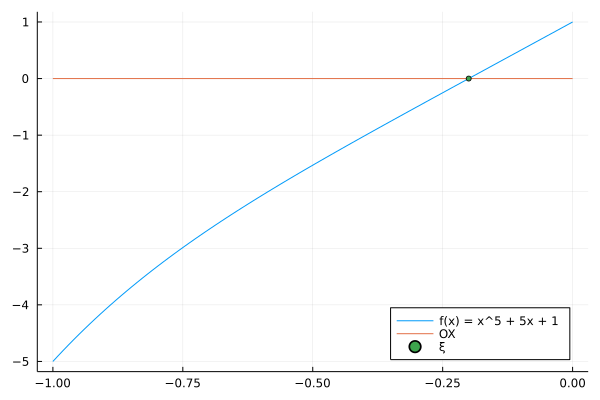

In [10]:
# În funcția de mai jos am făcut o vrăjitorie necesară specific
# pentru această librărie; ne permitem să apelăm direct f(1) fără
# să creăm o funcție "separată". 

# Also, în tot acest "capitol" așa vor fi definite funcțiile,
# acolo unde vezi `y` mai jos. De restul chestiilor se va ocupa
# funcția. Nu voi scrie indicații adiționale decât unde va fi cazul.

using Latexify, Plots, Symbolics
@syms x
D = Differential(x);

# Funcția ta aici
y = x^5 + 5x + 1
# Precizia ε dată
ε = 1e-5
# Numărul maxim de iterații
N = 100
# Aproximația inițială
x₀ = 0

g = eval(build_function(y, x))
g′ = eval(build_function(expand_derivatives(D(y)), x))
display("text/latex", latexify("x_0 = $x₀"))
function newtonMethod(y, x₀, ε, N)
    for steps in 0:N
        x₁ = x₀ - g(x₀)/g′(x₀)
        display("text/latex", latexify("x_$(steps+1) = $x₁")) # șirul de aproximații
        if (abs(x₁ - x₀) < ε)
            return (x₁, steps)
        end
        x₀ = x₁
    end
    error("Method did not converge in $N steps!")
end

res, noOfIterations = newtonMethod(y, x₀, ε, N);
println("Method converged to $res in $noOfIterations steps.")

# Capetele unde să facă graficul
a = -1
b = 0

xx = LinRange(a, b, 100)
yy = g.(xx)
plot(xx, yy, label = "f(x) = x^5 + 5x + 1", legend=:bottomright)
plot!(xx, zeros(100), label = "OX", legend=:bottomright)
scatter!([res], [0], label = "ξ", markersize = 3, markershape = :none)

### Metoda secantei
Fie $f$ o funcție continuă pe $[a, b]$ etc. 

Avem nevoie de două puncte inițiale $x_0$ și $x_1$. $x_0$ îl luăm ca fiind capătul care satisface:
\\[f''(x)f(x_0)>0,\ x_0 \in [a, b]\\]
iar $x_1$ este celălalt capăt.

Relația de iterație la metoda secantei este:
\begin{equation}
  \label{eq:met-secantei-recurenta}
  x_{n + 1} = x_n - \frac{f(x_n)(x_0 - x_n)}{f(x_0) - f(x_n)}
\end{equation}

Fie $f : [a, b] \to \mathbb{R}$, $f \in \mathcal{C}_{[a, b]}^{2}$, $f'$ și $f''$ au
semne constante, iar $|f'|$ este mărginită, adică $\exists m_1, M_1 > 0$ astfel încât $ 0 < m_1 \le |f'(x)| \le M_1$.
Fie $\xi$ soluția exactă a funcției. Atunci, eroarea este:
\begin{equation*}
  |\xi - x_n| \leq \frac{M_1 - m_1}{m_1} \left| x_n - x_{n - 1} \right|
\end{equation*}

Algoritmul se află mai jos.

L"$\xi_{1} = -2.5714285714285716$"

L"$\xi_{2} = -2.6925795053003534$"

L"$\xi_{3} = -2.654745821947625$"

L"$\xi_{4} = -2.666225742000354$"

L"$\xi_{5} = -2.6627111304707887$"

L"$\xi_{6} = -2.6637842221906776$"

L"$\xi_{7} = -2.6634563103521747$"

L"$\xi_{8} = -2.663556487159875$"

L"$\xi_{9} = -2.663525880852135$"

L"$\xi_{10} = -2.6635352315582956$"

Method converged to -2.6635352315582956 in 10 steps.


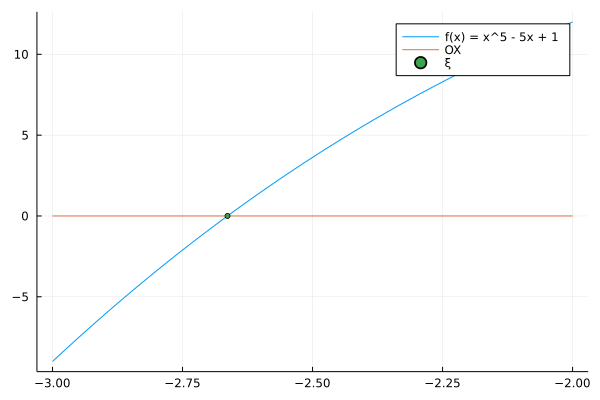

In [15]:
using Latexify, Plots, Symbolics
@syms x
D = Differential(x);

# Funcția ta aici
y = x^3 - x^2 - 3x + 18
# Precizia ε dată
ε = 1e-5
# Numărul maxim de iterații
N = 200
# Capetele intervalului
a = -3
b = -2

g = eval(build_function(y, x))
g′′ = eval(build_function(expand_derivatives(D(y)^2), x))

function secantMethod(y, a, b, ε, N)
    ξ = 0
    k = 0
    if g(a)g(b) < 0
        if g′′(a)g(a) > 0
            ξ = b
            k = 0
        else
            ξ = a
            k = 1
        end
    end
    i = 0
    while i < N
        d = ξ 
        if (k == 0)
            ξ = d - g(d)/(g(d) - g(a))*(d - a)
        else
            ξ = d - g(d)/(g(d) - g(b))*(d - b)
        end
        display(latexify("ξ_$(i+1) = $ξ"))
        i = i + 1
        if (abs(ξ - d) < ε)
            return (ξ, i) end
    end
    
end

res, noOfIterations = secantMethod(y, a, b, ε, N)
println("Method converged to $res in $noOfIterations steps.")
 
xx = LinRange(a, b, 100);
yy = g.(xx);
plot(xx, yy, label = "f(x) = x^5 - 5x + 1")
plot!(xx, zeros(100), label = "OX")
scatter!([res], [0], label = "ξ", markersize = 3, markershape = :none)

### Metoda înjumătățirii intervalului (bisecției)
Fie ecuația $f(x) = 0$, $f : \mathbb{R} \to \mathbb{R}$ continuă. Să presupunem că există un interval $[a, b]$ pentru care $f(a)f(b) < 0$; cu alte cuvinte, există cel puțin o soluție $\xi$ (eventual un număr impar) în acest interval. Metoda injumatatirii sau bipartitiei consta in aproximarea succesivă a radacinii ecuatiei
prin mijlocul intervalului $[a,b]$ care se noteaza cu $c = \frac{a + b}{2}$. Dacă $f(c) = 0$, atunci $\xi = c$. Dacă acesta este negativ, atunci $\xi \in [a, c]$, altfel $\xi \in [c, b]$. Calculele se reiau pe fiecare subinterval.

Eroarea între soluția exactă și aproximanta $x$ este dată de:
\begin{equation}
\varepsilon < |\xi - x| \leq \frac{b - a}{2^n}
\end{equation}
iar pentru a afla numărul de iterații necesare:
\begin{equation}
n = \log_2\left(\frac{b - a}{\varepsilon}\right)
\end{equation}

Metoda bisecţiei converge spre soluţie indiferent cât de departe este punctul de
pornire, fapt pentru care se consideră o metodă globală de determinare a
soluţiilor.

Convergenţa spre soluţie este lentă, trebuie executate un număr mare de
împărţiri ale intervalului pentru a ajunge la o precizie satisfăcătoare.

Metoda bisecţiei nu poate fi utilizată pentru determinarea soluţiilor unei
funcţii care este tangentă la axa $OX$, fără să o străpungă, fiindcă nu se
verifică chiar condiţia de start.

Algoritmul se află mai jos.

In [19]:
using Latexify, Plots, Symbolics
@syms x
D = Differential(x);

# Funcția ta aici
y = x^3 - x^2 - 3x + 18
# Precizia ε dată
ε = 1e-5
# Numărul maxim de iterații
N = 200
a = -1
b = 1

g = eval(build_function(y, x))
@inline bisect(a,b) = (a + b) / 2
    
function bisectionMethod(y, a, b, ε)
    N = 1 + round(Int, (log(b - a) - log(ε))/log(2))
    if g(a) * g(b) > 0
        error("Function values at endpoints must have different signs\ng($a) = $(g(a)) and g($b) = $(g(b))")
    end
          
    i = 0
    c = bisect(a, b)
    while (abs(g(c)) ≥ ε && i <= N)
        if g(a)g(c) < 0
            b = c;
        else
            a = c;
        end       
        c = bisect(a, b)
        display(latexify("x_$(i+1) = $c"))
        i = i + 1
    end
    return (c, i)
 end

res, noOfIterations = bisectionMethod(y, a, b, ε)
println("Method converged to $res in $noOfIterations steps.")
 
xx = LinRange(a, b, 100);
yy = g.(xx);
plot(xx, yy, label = "f(x)")
plot!(xx, zeros(100), label = "OX")
scatter!([res], [0], label = "ξ", markersize = 3, markershape = :none)

LoadError: Function values at endpoints must have different signs
g(-1) = 19 and g(1) = 15

### Metoda punctului fix
Se numește punct fix al unei aplicații $g(x)$ un număr real $p$ care verifică relația $p = g(p)$.

Pentru această metodă, definim șirul $\{x_n\}$ de aproximante, unde $x_0$ este dat și $x_{n+1} = g(x_n)$.

Este necesar ca soluția ecuației $x = g(x)$ în intervalul $[a, b]$ să fie același cu soluția ecuației $f(x) = 0$ pe același interval.

Dacă în intervalul $[a, b]$ funcția $g$ verifică următoarele condiții:
1. pentru orice $x \in [a, b]$ are loc $g(x) \in [a, b]$ sau
2. $g$ este o aplicație strict contractantă, adică există un număr real $L \in [0, 1)$ a.î. $\forall x \in [a, b],\ \forall y \in [a, b]$ avem $|g(x) - g(y)| \leq L|x - y|$

atunci, oricare ar fi $x_0 \in [a, b]$ șirul definit prin $x_{n+1} = g(x_n)$ converge spre unica soluție $\xi \in [a, b]$ a ecuației $x = g(x)$.

Eroarea este dată făcând $n$ să tindă spre $\infty$:
\begin{equation*}
  |\xi - x_n| \leq |x_1 - x_0|\frac{L^n}{1 - L}
\end{equation*}

Dacă se poate calcula (estima) $g'(\xi)$, atunci are loc următorul rezultat: fie $\xi$ o soluție a ecuației $x = g(x)$ cu $g'$ funcție continuă. Dacă
  $|g'(\xi)| \le 1$, atunci există un interval $[a, b]$ conținând $\xi$ pentru
  care șirul definit prin $x_0 \in [a, b]$ și $x_{n+1} = g(x_n)$ converge la $\xi$.
  

Este invers și opusul: fie $\xi$ o soluție a ecuației $x = g(x)$. Dacă $g'$ este continuă într-o
  vecinătate a lui $\xi$ și $|g'(\xi)| > 1$, $\forall x_0 \ne \xi$, șirul
  definit prin $x_0$ și $x_{n+1} = g(x_n)$ nu converge spre $\xi$.
  
  Dacă $|g'(\xi)| = 1$, atunci șirul $\{x_n\}$ poate converge sau diverge.

Pentru a determina în ce condiții șirul definit cu ecuația $x_{n+1} = g(x_n)$,
$n = 0, 1, ...$ este convergent cu limita $\alpha$, se presupune $g(x)$
derivabilă pe $[a, b]$ și se calculează distanța la rădăcină, după care se
aplică teorema creșterilor finite (Lagrange):

\begin{equation*}
  |x_i - \alpha| = |g(x_i) - g(\alpha)| = |g'(\xi)|^\ast|x_i - \alpha|,\ \xi \in [a, b]
\end{equation*}

Din relația de mai sus rezultă că șirul $\{x_i\}_{i \in \mathbb{N}}$ este
convergent spre $\alpha$ dacă distanța la rădăcină scade la fiecare iterație:
\begin{equation*}
  |g'(\xi)| < 1,\qquad\forall \xi \in [a, b]
\end{equation*}

Este invers și opusul: fie $\xi$ o soluție a ecuației $x = g(x)$. Dacă $g'$ este continuă într-o
  vecinătate a lui $\xi$ și $|g'(\xi)| > 1$, $\forall x_0 \ne \xi$, șirul
  definit prin $x_0$ și $x_{n+1} = g(x_n)$ nu converge spre $\xi$.
  
  Dacă $|g'(\xi)| = 1$, atunci șirul $\{x_n\}$ poate converge sau diverge.

Pentru a determina în ce condiții șirul definit cu ecuația $x_{n+1} = g(x_n)$,
$n = 0, 1, ...$ este convergent cu limita $\alpha$, se presupune $g(x)$
derivabilă pe $[a, b]$ și se calculează distanța la rădăcină, după care se
aplică teorema creșterilor finite (Lagrange):

\begin{equation*}
  |x_i - \alpha| = |g(x_i) - g(\alpha)| = |g'(\xi)|^\ast|x_i - \alpha|,\ \xi \in [a, b]
\end{equation*}

Din relația de mai sus rezultă că șirul $\{x_i\}_{i \in \mathbb{N}}$ este
convergent spre $\alpha$ dacă distanța la rădăcină scade la fiecare iterație:
\begin{equation*}
  |g'(\xi)| < 1,\qquad\forall \xi \in [a, b]
\end{equation*}

Algoritmul de interes se află mai jos.

In [ ]:
using Latexify, Plots, Symbolics
@syms x
D = Differential(x);

# Funcția ta aici. Aici e mai complicat, trebuie modificată
# funcția pentru a scădea cu fiecare iterație. De exemplu, cu
#                       y = x^2 - x - 1
# trebuie s-o convertim într-o formă în care avem x = g(x).
# De altfel, 
#       x^2 - x - 1 = 0 => x^2 = 1 + x => x = sqrt(x+1)
# și definim g(x) = sqrt(x+1).
# Speră aici că n-o să fii nevoit să
# ai funcții ciudat de "inversat" cu metoda asta.
y = sqrt(x+1)

# Precizia ε dată
ε = 1e-5
# Numărul maxim de iterații
N = 100
x0 = 0

g = eval(build_function(y, x))
 
function fixedPointMethod(y, x0, ε, N)
    k = 0
    ξ = x0
    while k ≤ N
        x0 = g(x0)
        k = k + 1
        if abs(g(x0) - x0) ≤ ε
            ξ = x0
            break
        end
    end
    return (ξ, k)
end


res, noOfIterations = fixedPointMethod(y, x0, ε, N)
println("Method converged to $res in $noOfIterations steps.")
 
a = 0
b = 2

xx = LinRange(a, b, 100);
yy = g.(xx);
plot(xx, yy, label = "g(x) = √(x + 1)")
plot!(xx, xx.^2 .- xx .+ 1, label = "f(x) = x^2 - x - 1")
plot!(xx, xx, label = "y = x")
scatter!([res], [res], label = "ξ", markersize = 3, markershape = :none)

# Rezolvarea sistemelor de ecuații generale
## Metode directe de rezolvare a sistemelor liniare

### Metoda eliminării gaussiene

In [ ]:
using LinearAlgebra, Latexify

eps = 1e-5
Ax = float([-1 5 1; -1 -2 4; 8 -1 0])
println("Ax = ")
display(latexify(Ax))

b = float([2, 5, -8])
println("b = ")
display(latexify(b))

# Trebuie să rezolvăm Ax = b
# Julia o rezolvă folosind (în esență) eliminare gaussiană:
X = round.(Ax \ b, digits=5);
println("X = ")
display(latexify(X))

# De dragul exercițiului însă, o s-o am implementată ca la carte:
function small_enough(v::Number, ε=eps)
    return abs(v - 0.0) < ε
end

function gaussElimination(X::Array, b::Array)
    A = hcat(X, b)
    N = size(A, 1)

    # elimination
    for i in 1:N-1
        pivot = A[i, i]
        for j in i+1:N
            base = A[j, i] / pivot
            A[j,:] = A[j,:] - (base .* A[i,:])
        end
    end

    if small_enough(A[N, N])
        error("Cannot eliminate.")
    end

    # feedback
    b = A[:, end]
    b[end] /= A[end, end-1] # last line
    for i in N-1:-1:1
        pivot = A[i,i]
        b[i] -= sum(A[i,i+1:end-1] .* b[i+1:end])
        b[i] /= pivot
    end
    return b
end

println("X = (GAUSS)")
display(latexify(gaussElimination(Ax, b), digits=5))

### Condiționarea unei matrice

Dacă $A$ este nesingulară, atunci
\begin{equation*}
\operatorname{cond}(A) = \|A\|\|A^{-1}\|
\end{equation*}
se numește număr de condiționare al matricei $A$.

In [ ]:
A = float([-1 5 1; -1 -2 4; 8 -1 0])
cond(A)

### Metoda iterativă Jacobi

In [ ]:
# Din punctul ăsta nu mai am chef să implementez algoritmii.
using IterativeSolvers, Latexify

A = float([3 10 -1 2; 20 4 5 3; 19 5 -5 -1; -1 1 -2 5])
println("A = ")
display(latexify(A))

b = float([1, 15, 21, 17])
println("b = ")
display(latexify(b))

println("With A in diagonally dominant form through line and column transformations:")
A′ = float([20 4 5 3; 3 10 -1 2; 1 -1 10 4; -1 1 -2 5])
println("A′ = ")
display(latexify(A′))

b′ = float([15, 1, -6, 17])
println("b′ = ")
display(latexify(b′))

X = zeros(size(b′))
D = diagm(diag(A′))
C = D - A′

for i=1:100
    X = inv(D) * C * X + inv(D) * b′
    # display(X)
end

println("X = (Custom algorithm)")
display(latexify(X))

println("X = (backslash operator, to check)")
display(latexify(round.(A′ \ b′, digits=5)))

### Metoda iterativă Gauss-Seidel

In [ ]:
using IterativeSolvers, Latexify

A = float([-1 5 1; -1 -2 4; 8 -1 0])
println("A = ")
display(latexify(A))

b = float([2, 5, -8])
println("b = ")
display(latexify(b))

# trebuie ca diagonala să nu aibă niciun zero, deci interschimbăm
# corespunzător liniile în așa fel încât (ideal) să avem 0 pe undeva
# unde nu-i pe diagonala principală; aici l-am pus în NE.
A′ = [8 -1 0; -1 5 1; -1 -2 4]
b′ = [-8, 2, 5]
X = gauss_seidel(A′, b′; maxiter=100)
println("X = (IterativeSolvers)")
display(latexify(X))

println("X = (backslash operator, to check)")
display(latexify(round.(A \ b, digits=5)))

# Aproximarea funcțiilor prin polinoane
## Polinoame de interpolare
### Interpolarea polinomială Lagrange

\\[
    (L_n f)(x_i) = \sum_{k=0}^n f(x_k)\left ( \prod_{j = 0, j \neq k}^{n} \frac{x - x_j}{x_k - x_j} \right )
\\]

x^2 + (3//1)*x


pl = Plot{Plots.GRBackend() n=2}


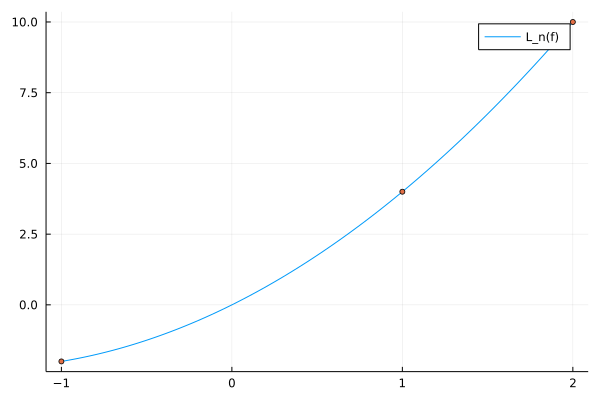

In [14]:
using LinearAlgebra, Symbolics, Latexify, Plots
@syms x::Real

# Tabloul absciselor punctelor de interpolare
X = [-1, 1, 2];

# Tabloul ordonatelor punctelor de interpolare
# Pentru exemplu, o să generez y bazat pe x,
# dar ți se dă în problemă, drept pentru care
# ar trebui să ai y = [y0, y1, y2, ...]
# De asemenea, sortez X automat, ca să nu conteze
Y = X.^3 .- X.^2 - 3*X + 18;

function lagrangePolynomial(X, Y)
    local l = 0
    n = size(X,1)
    for i in 1:n
        P = 1
        for j in 1:n
            if j ≠ i
                P = P * (x .- X[j])/(X[i] .- X[j])
            end
        end
        l = l .+ Y[i]*P
    end
    return expand(l)
end

# Facem funcția să fie apelabilă cu adevărat;
# este același șmen ca mult mai sus
g = eval(build_function(lagrangePolynomial(X,Y), x))
display(lagrangePolynomial(X,Y))
println()

# Ca să fie plot-ul automat
XX = LinRange(extrema(X)[1], extrema(X)[2], 100)
YY = g.(XX)

pl = plot(XX, YY, label = "L_n(f)");
scatter!(pl, X, Y, markersize=3, label="", shape=:none)
@show pl

### Evaluarea restului la interpolarea Lagrange. Polinoame Cebîșev

Polinomul de interpolare Lagrange generează formula de aproximare \\[f = L_n f + R_n f\\] unde prin $R_n f$ s-a notat termenul rest.

S-a observat că dacă alegem nodurile echidistante, atunci în apropierea capetelor erorile devin semnificative (efectul Runge). De aceea, este de preferat să se mențină numărul de noduri mic ($n \leq 10$).

Something, something, o grămadă de teorie, poți căuta și tu în carte. Cert e că, pentru a obține cea mai bună funcție pentru $R_n f$, folosim noduri de tip Cebîșev, soluții ale polinoamelor Cebîșev.

Polinoamele de tip Cebîșev pot fi definite astfel:
\\[
\begin{gather*}
T_0(1) = 1,\ T_1(x) = x\\
T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x),\ n \ge 1
\end{gather*}
\\]

Alternativ, formula explicită este $T_n(x) = \cos(n \cdot ar \cos x), x \in [-1, 1], n = 0, 1, ...$

Soluțiile polinomului de tip Cebîșev sunt:
\\[
\begin{gather*}
x_i = \cos \left( \frac{2k+1}{2n+2} \pi \right),\ k = 0, 1, ..., n
\end{gather*}
\\]

Dacă nodurile de interpolare sunt Cebîșev pe $[-1, 1]$, eroarea de interpolare devine
\\[
\begin{gather*}
|f(x) - p(x)| \le \frac{1}{2^n(n+1)!}\max\limits_{t \in [-1, 1]} |f^{(n+1)}(t)| 
\end{gather*}
\\]

Încă enșpemii de chestii de teorie pe aici. Ideea e că teorema lui Fejer zice că dacă avem o funcție pe $[-1, 1]$ și $n$ noduri Cebîșev, atunci există un polinom de grad $2n - 1$ care interpolează $f$ în punctele specificate și pentru care $\|f - P_{2n-1}\| \to 0,\ n \to \infty$. 

Pentru a minimiza eroarea la interpolarea Lagrange pentru o funcție pe intervalul $[a, b]$, alegem nodurile astfel:
\\[
\begin{gather*}
x_i = \frac{b - a}{2}\cos \frac{(2i-1)\pi}{2n} + \frac{a+b}{2}
\end{gather*}
\\]
Asta se cheamă interpolare Cebîșev.

### Metoda lui Aitken
Metoda constă în generarea următorului tablou:
\\[
\begin{gather*}
x_0\quad{}f_{00}\\
x_1\quad{}f_{10}\quad{}f_{11}\\
x_2\quad{}f_{20}\quad{}f_{21}\quad{}f_{22}\\
x_3\quad{}f_{30}\quad{}f_{31}\quad{}f_{32}\quad{}f_{33}\\
\vdots\\
x_m\quad{}f_{m0}\quad{}f_{m1}\quad{}f_{m2}\quad{}f_{m3}\cdots\cdots{}f_{mm}\\
\end{gather*}
\\]
unde $f_{i0} = f(x_i)$ iar
\\[
\begin{gather*}
f_{i,j+1} = \frac{1}{x_i-x_j}\begin{vmatrix}f_{jj} & x_j - x\\f_{ij} & x_i - x\end{vmatrix}
\end{gather*}
\\]

Se observă că \\[f_{11} = \frac{x-x_1}{x_0-x_1}f(x_0) + \frac{x-x_1}{x_1-x_0}f(x_1) = (L_1 f)(x)\\]
În mod asemănător, $f_{ii} = (L_i f)(x_0)$.

### Diferențe divizate
Să considerăm $f : I \to \mathbb{R}$. Diferențele divizate de ordinul $p$ se definesc astfel:
* pentru $p = 0$: $[x_0; f] = f(x_0)$
* pentru $p = 1$: $[x_0, x_1; f] = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$
* pentru $p \ge 2$: $[x_0, x_1, ..., x_p; f] = \frac{[x_1, x_2, ..., x_p; f] - [x_0, x_1, ..., x_{p-1}; f]}{x_p - x_0}$

Fie $r, k \in \mathbb{N},\ 0 \le r < m$ și $1 \le k < m - r$. Mărimea
\\[
[x_r, ..., x_{r+k}; f] = \frac{[x_{r+1}, x_{r+2}, ..., x_{r+k}; f] - [x_{r}, x_{r+1}, ..., x_{r+k-1}; f]}{x_{r+k} - x_r}
\\]
se numește diferența divizată de ordinul $k$ a funcției $f$ pe punctul $x_r$.

În algoritmul de mai jos, pe prima coloană avem elementele din $X$, pe a doua elementele din $f(X) = Y$ și apoi diferențele divizate de ordinul 1, 2, ..., m.

In [ ]:
X = sort([1, 2, 4, 6, 7, 3, 2.2, 6.4]);
Y = sin.(X) .+ cos.(X.^2) .+ log.(X);

function finiteDifferences(X, Y)
    N = size(X, 1)    
    D = zeros(N, N)
    D[:,1] = Y'
    for j=2:N
        for k=j:N
            D[k,j]=(D[k,j-1]-D[k-1,j-1])/(X[k]-X[k-j+1]);
        end
    end
    return D
end
show(stdout, "text/plain", finiteDifferences(X, Y))

## Interpolare Newton
### Polinomul de interpolare Newton cu diferențe divizate

In [ ]:
using Symbolics, Latexify, LinearAlgebra
@syms x::Real
X = [4, 6, 8, 10];
Y = [1, 3, 8, 20]

function finiteDifferences(X, Y)
    N = size(X, 1)    
    D = zeros(N, N)
    D[:,1] = Y'
    for j=2:N
        for k=j:N
            D[k,j]=(D[k,j-1]-D[k-1,j-1])/(X[k]-X[k-j+1]);
        end
    end
    return D
end
# Just for test
function lagrangePolynomial(X, Y)
    local l = 0
    n = size(X,1)
    for i in 1:n
        P = 1
        for j in 1:n
            if j ≠ i
                P = P * (x .- X[j])/(X[i] .- X[j])
            end
        end
        l = l .+ Y[i]*P
    end
    return expand(l)
end

function newtonInterpolation(X, Y)
    D = finiteDifferences(X, Y)
    N = size(X, 1)
    res = D[N,N]
    for i = N-1:-1:1
        res = res * (x - X[i]) + D[i, i]
    end
    return expand(res)
end

g = eval(build_function(newtonInterpolation(X,Y), x))
h = eval(build_function(lagrangePolynomial(X,Y), x))

display(newtonInterpolation(X,Y))
println()

# Ca să fie plot-ul automat
XX = LinRange(extrema(X)[1], extrema(X)[2], 300)
YY = g.(XX)

pl = plot(XX, YY, label = "N_n(f)");
scatter!(pl, X, Y, markersize=3, label="", shape=:none)
@show pl